In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

iris = pd.read_csv('Iris.csv')
# Rename Values to correct
iris.rename(columns={'PetalLengthCm':'petal_lenght'}, inplace=True)
iris.rename(columns={'PetalWidthCm': 'petal_width'}, inplace=True)
iris.drop(columns = ['SepalLengthCm', 'SepalWidthCm'], inplace=True)
iris

,Id,petal_lenght,petal_width,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


Is it possible to predict the species of an iris flower sample, given its petal length and petal width?

This is an example of a classification problem: finding a predictive mapping between a set of input variables (here petal length and petal width) and a target variable (here the species of iris flower).

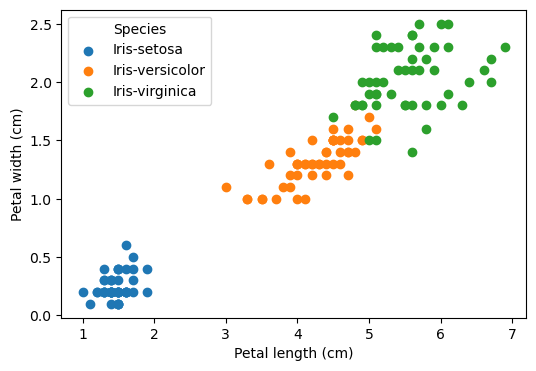

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

for target_name, group in iris.groupby('Species'):
    ax.scatter(group.petal_lenght, group.petal_width, label=target_name)

ax.legend(title='Species')
ax.set(xlabel = 'Petal length (cm)', ylabel = 'Petal width (cm)' )
plt.show()

Basics of k-NN algorithm
Consider that we have a new iris flower sample, with its petal length measured as 3.2 cm, and petal width 1.3 cm. We wish to predict its species. Let us look at the graphical representation of our training data again, but with the new sample added to the graph as a black dot:

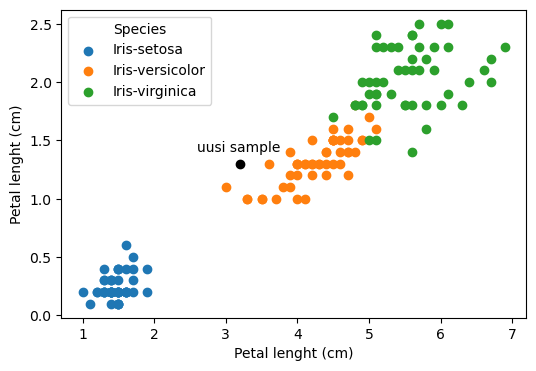

In [37]:
# Generate a scatter plot of the dataset (coloring by species)
fig, ax = plt.subplots(figsize=(6, 4))

for target_name, group in iris.groupby('Species'):
    ax.scatter(group.petal_lenght, group.petal_width, label=target_name)

ax.plot([3.2], [1.3], 'o', c='black')   # New flower sample data point
ax.text(2.6, 1.4, 'uusi sample')
ax.legend(title='Species')
ax.set(xlabel = 'Petal lenght (cm)', ylabel = 'Petal lenght (cm)')


plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
X = iris.drop(columns= 'Species')  # inputs ?
y = iris['Species'] # targets
model.fit(X, y) # Build the classifier 

KNeighborsClassifier(n_neighbors=3)